In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ptick ##これが必要！

In [2]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})



In [29]:
# 絶対値じゃないものの分布


cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col

percent =50
# これは各年
name ='価格差 (時間前市場 - スポット市場) (Yen/kWh)'

value2018 = df_select[df_select['DateTime'].dt.year ==2018][name].dropna().values

value2019 = df_select[df_select['DateTime'].dt.year ==2019][name].dropna().values

value2020 = df_select[df_select['DateTime'].dt.year ==2020][name].dropna().values

value2021 = df_select[df_select['DateTime'].dt.year ==2021][name].dropna().values

value2022 = df_select[df_select['DateTime'].dt.year ==2022][name].dropna().values
value2018_2022 =df_select[df_select['DateTime'].dt.year <= 2022][name].dropna().values





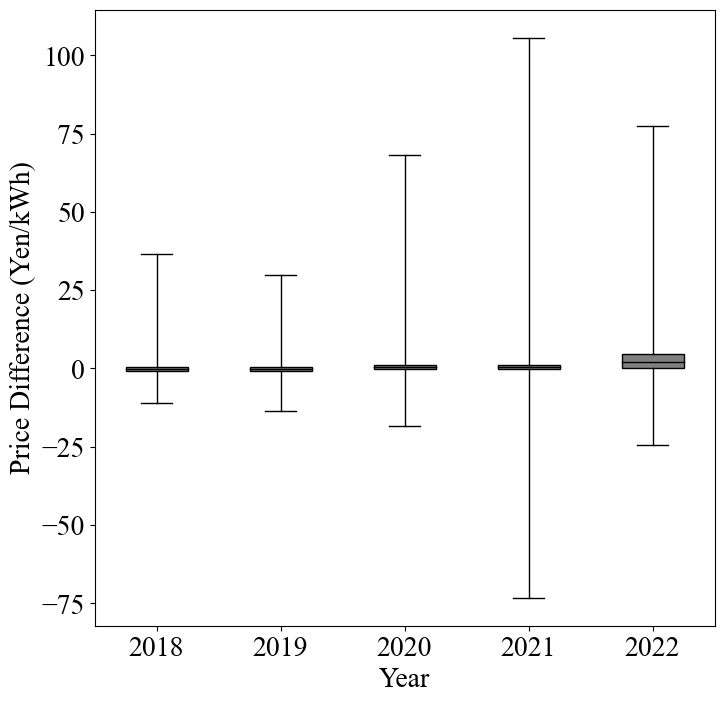

In [46]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =20
data = [value2018,value2019,value2020,value2021,value2022]

fig =plt.figure(figsize=(8,8))
ax1 = fig.subplots()
ax1.boxplot(data,whis=(0,100),vert=True,  # 横向きにする
           patch_artist=True,  # 細かい設定をできるようにする
           widths=0.5,  # boxの幅の設定
           boxprops=dict(facecolor='gray',  # boxの塗りつぶし色の設定
                         color='black', linewidth=1),  # boxの枠線の設定
           medianprops=dict(color='black', linewidth=1),  # 中央値の線の設定
           whiskerprops=dict(color='black', linewidth=1),  # ヒゲの線の設定
           capprops=dict(color='black', linewidth=1),  # ヒゲの先端の線の設定
           )
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels([2018,2019,2020,2021,2022])
ax1.set_ylabel('Price Difference (Yen/kWh)')
ax1.set_xlabel('Year')
plt.savefig('../../../卒論関連書類/画像/4章画像_new/箱髭/hakohige.png')
plt.show()

In [45]:
years=[2018,2019,2020,2021,2022,'2018-2022']


for i,d in enumerate(data):
    y=years[i]
    print(y,'平均',round(np.mean(d),6))
    print(y,'中央値',round(np.median(d),6))
    print(y,'不偏標準偏差',round(np.std(d,ddof=1),6))
    print(y,'四分位範囲',round(np.percentile(d,75)-np.percentile(d,25),6))




2018 平均 -0.059545
2018 中央値 -0.15
2018 不偏標準偏差 1.699769
2018 四分位範囲 1.4
2019 平均 0.080962
2019 中央値 -0.09
2019 不偏標準偏差 1.781125
2019 四分位範囲 1.27
2020 平均 0.545329
2020 中央値 0.38
2020 不偏標準偏差 1.889725
2020 四分位範囲 1.14
2021 平均 1.055265
2021 中央値 0.32
2021 不偏標準偏差 6.177626
2021 四分位範囲 1.41
2022 平均 2.870643
2022 中央値 2.12
2022 不偏標準偏差 5.214597
2022 四分位範囲 4.48
2018-2022 平均 0.937952
2018-2022 中央値 0.29
2018-2022 不偏標準偏差 4.077276
2018-2022 四分位範囲 1.72


In [ ]:
# 相関係数



Text(0.7, 0.5, 'Average: 2.87\nMedian: 2.12\nSD: 5.21')

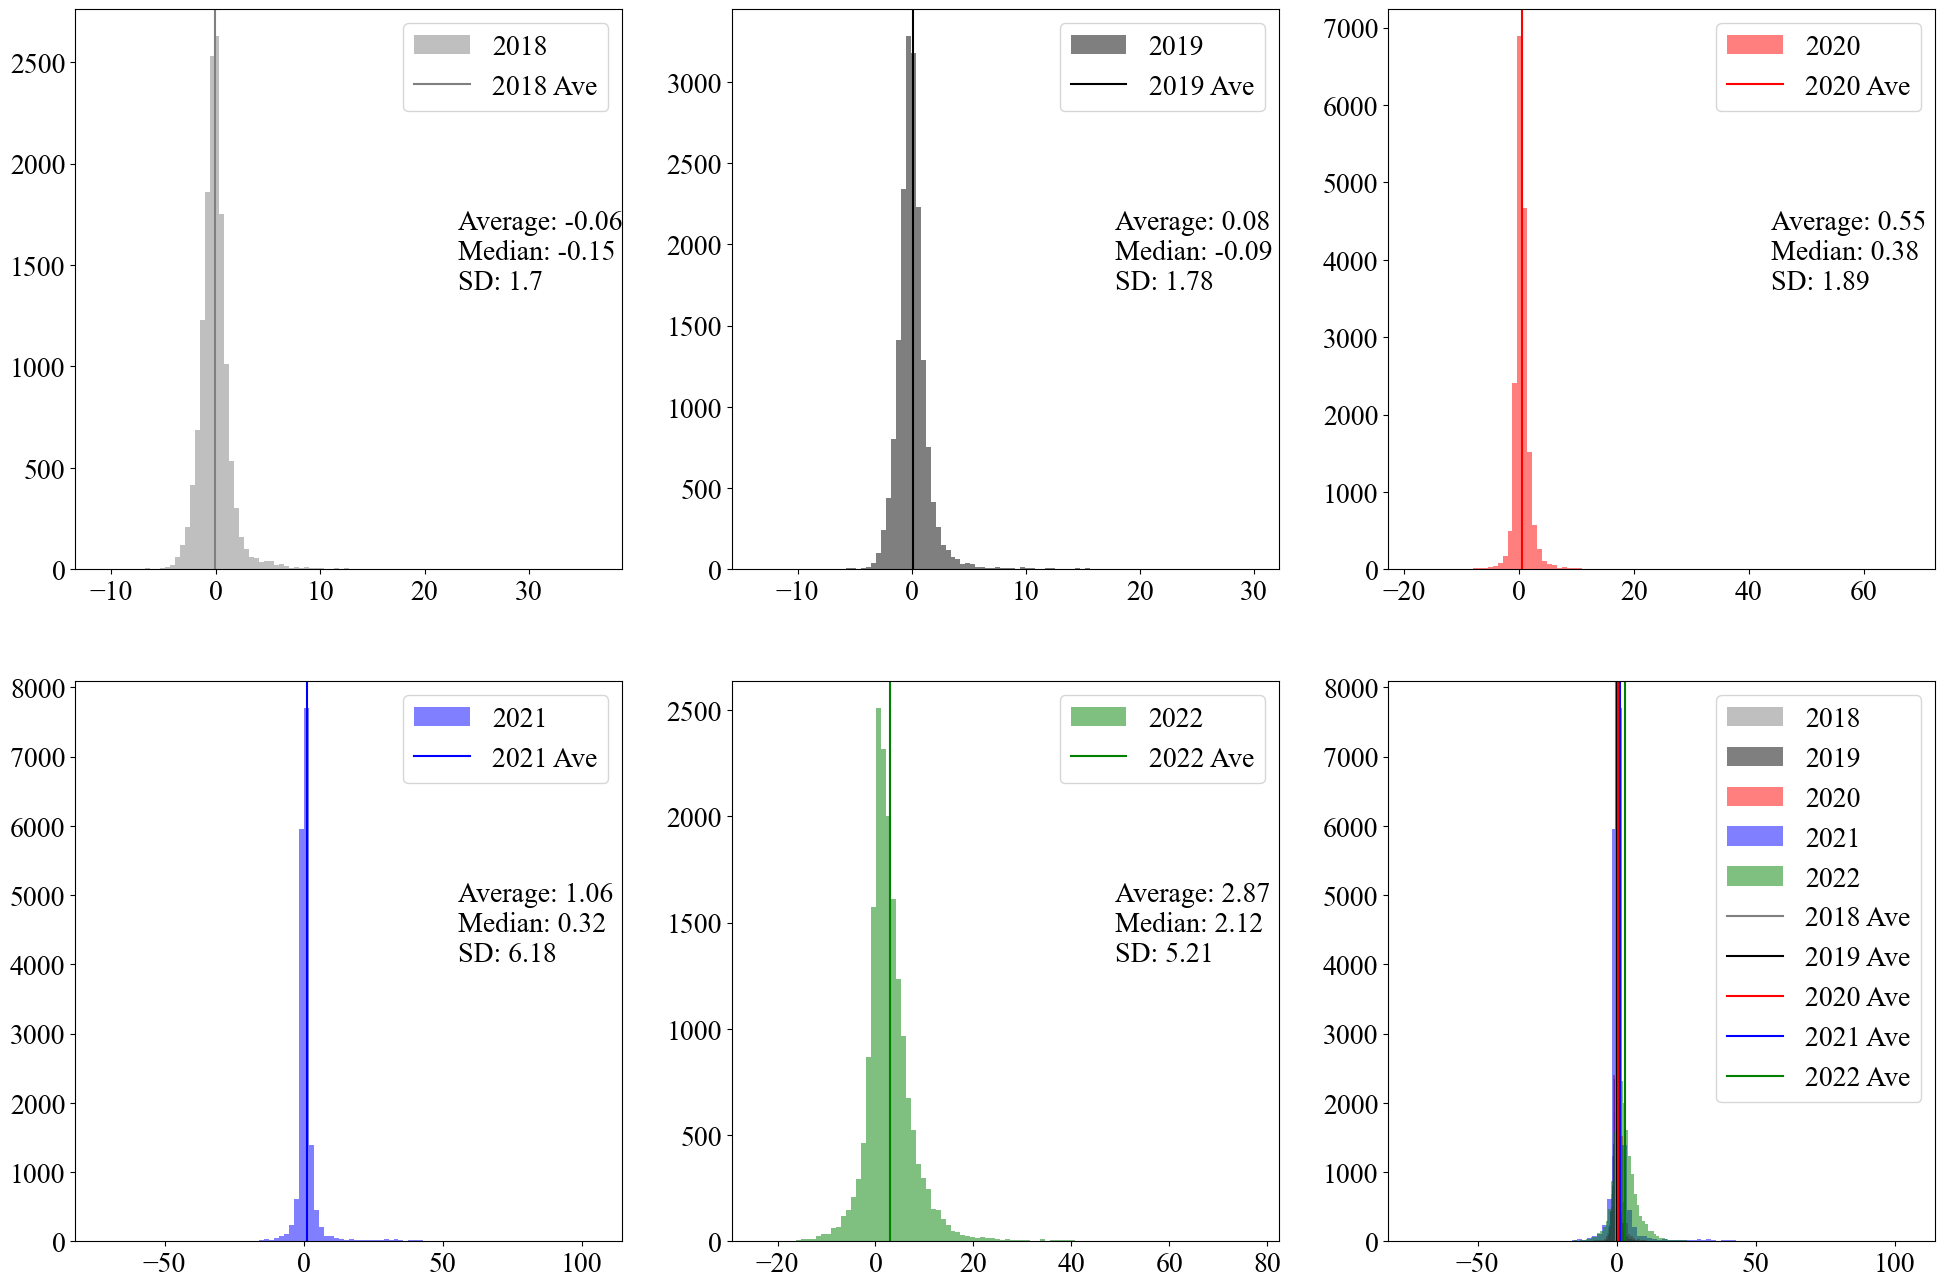

In [3]:
# 絶対値じゃないものの分布


cols = ['DateTime', 'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col

percent =50
# これは各年
name ='価格差 (時間前市場 - スポット市場) (Yen/kWh)'

value2018 = df_select[df_select['DateTime'].dt.year ==2018][name].dropna().values

value2019 = df_select[df_select['DateTime'].dt.year ==2019][name].dropna().values

value2020 = df_select[df_select['DateTime'].dt.year ==2020][name].dropna().values

value2021 = df_select[df_select['DateTime'].dt.year ==2021][name].dropna().values

value2022 = df_select[df_select['DateTime'].dt.year ==2022][name].dropna().values



# 絶対値の分布
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =20

fig = plt.figure(figsize=(24,16))
ax1= fig.add_subplot(2,3,1)
ax2= fig.add_subplot(2,3,2)
ax3= fig.add_subplot(2,3,3)
ax4= fig.add_subplot(2,3,4)
ax5= fig.add_subplot(2,3,5)
ax= fig.add_subplot(2,3,6)

# ax= fig.add_subplot()
ax1.hist(value2018,bins=100,alpha= 0.5,label=2018,color ='gray')

ax2.hist(value2019,bins=100,alpha= 0.5,label=2019,color ='black')
ax3.hist(value2020,bins=100,alpha= 0.5,label=2020,color ='r')
ax4.hist(value2021,bins=100,alpha= 0.5,label=2021,color ='b')
ax5.hist(value2022,bins=100,alpha= 0.5,label=2022,color ='g')


ax1.axvline(value2018.mean(),label='2018 Ave',color ='gray')
ax2.axvline(value2019.mean(),label='2019 Ave',color ='black')
ax3.axvline(value2020.mean(),label='2020 Ave',color ='r')
ax4.axvline(value2021.mean(),label='2021 Ave',color ='b')
ax5.axvline(value2022.mean(),label='2022 Ave',color ='g')


ax.hist(value2018,bins=100,alpha= 0.5,label=2018,color ='gray')
ax.hist(value2019,bins=100,alpha= 0.5,label=2019,color ='black')
ax.hist(value2020,bins=100,alpha= 0.5,label=2020,color ='r')
ax.hist(value2021,bins=100,alpha= 0.5,label=2021,color ='b')
ax.hist(value2022,bins=100,alpha= 0.5,label=2022,color ='g')


ax.axvline(value2018.mean(),label='2018 Ave',color ='gray')
ax.axvline(value2019.mean(),label='2019 Ave',color ='black')
ax.axvline(value2020.mean(),label='2020 Ave',color ='r')
ax.axvline(value2021.mean(),label='2021 Ave',color ='b')
ax.axvline(value2022.mean(),label='2022 Ave',color ='g')


ax.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
roundnum=2
x_text=0.7
y_text=0.5
fontsize=12
ax1.text(x_text,y_text,f'Average: {round(value2018.mean(),roundnum)}\nMedian: {round(np.median(value2018),roundnum)}\nSD: {round(np.std(value2018,ddof=1),roundnum)}',transform=ax1.transAxes)
ax2.text(x_text,y_text,f'Average: {round(value2019.mean(),roundnum)}\nMedian: {round(np.median(value2019),roundnum)}\nSD: {round(np.std(value2019,ddof=1),roundnum)}',transform=ax2.transAxes)
ax3.text(x_text,y_text,f'Average: {round(value2020.mean(),roundnum)}\nMedian: {round(np.median(value2020),roundnum)}\nSD: {round(np.std(value2020,ddof=1),roundnum)}',transform=ax3.transAxes)
ax4.text(x_text,y_text,f'Average: {round(value2021.mean(),roundnum)}\nMedian: {round(np.median(value2021),roundnum)}\nSD: {round(np.std(value2021,ddof=1),roundnum)}',transform=ax4.transAxes)
ax5.text(x_text,y_text,f'Average: {round(value2022.mean(),roundnum)}\nMedian: {round(np.median(value2022),roundnum)}\nSD: {round(np.std(value2022,ddof=1),roundnum)}',transform=ax5.transAxes)

# plt.savefig('../../../卒論関連書類/画像/3章画像/分析結果画像/価格差の絶対値の分布/絶対値じゃない分布一覧years.png')

